# ДЗ Линейная регрессия

В данном задании мы рассмотрим набор данных об учащихся, собранный в 2006 году в одной из школ Португалии. Данные представлены в неудобном для машинного обучения виде, и содержат мусор. Ваша задача &mdash; привести их к надлежащему виду и обучить на них простую модель.

Данные состоят из четырех файлов:
- data.csv &mdash; основная таблица с информацией о учащихся
- scores.csv &mdash; список финальных оценок по одному из предметов (20-балльная шкала переведенная в проценты)
- attendance.csv &mdash; таблица посещений занятий по этому предмету
- school_support.txt &mdash; список учащихся, которым оказывается финансовая поддержка

Ваша задача &mdash; построить модель для предсказания финальных оценок исходя из всех остальных данных и проверить качество ее работы с помощью кросс-валидации. В качестве алгоритма мы будем использовать линейную регрессию

Расшифровка столбцов в data.csv для справки:
- age &mdash; возраст
- Medu &mdash; уровень образования матери (по некоторой условной шкале)
- Fedu &mdash; уровень образования отца (по некоторой условной шкале)
- traveltime &mdash; время в пути до школы (1 – < 15 мин., 2 – от 15 до 30 мин., 3 – от 30 мин. to 1 ч.
или 4 – > 1 ч.)
- studytime &mdash; время, затрачиваемое на занятия вне школы (1 – < 2 ч., 2 – от 2 до 5 ч., 3 – от 5 до 10 ч. или 4 – > 10 ч.)
- famrel &mdash; насколько хорошие отношения в семье у учащегося (по некоторой условной шкале)
- freetime &mdash; количество свободного времени вне школы (по некоторой условной шкале)
- goout &mdash; время, затрачиваемое на общение с друзьями (по некоторой условной шкале)
- Dalc &mdash; количество употребления алкоголя в учебные дни (по некоторой условной шкале)
- Walc &mdash; количество употребления алкоголя в неучебные дни (по некоторой условной шкале)
- health &mdash; уровень здоровья (по некоторой условной шкале)
- sex_M &mdash; пол: мужской (1) или женский (0)
- address_U &mdash; живет ли учащийся в городе (1) или в пригороде (0)
- famsize_LE3 &mdash; размер семьи: не больше 3 человек (1) или больше (0)
- Pstatus_T &mdash; живут ли родители вместе (1) или отдельно (0)
- nursery &mdash; посещал ли учащийся детский сад
- plans_university &mdash; планирует ли учащийся поступать в университет (-1 или 1)
- past_failures &mdash; количество неудовлетворительных оценок по другим предметам ранее (от 0 до 4)

*Примечание. Несколько признаков в данных содержат ошибки/проблемы/некорректности. Эти проблемы нужно исправить. Для
проверки &mdash; всего в данных таких проблем четыре.*
P.s. дз поделилась Костюченко Мирослава https://github.com/miroslav2023/task_2/blob/main/task2_linreg_practice.ipynb. Вроде условием списывания было полное понимание, поэтому комментарии такие развернутые.

### Задача 1: сломанный признак (а может и не один)
__(1 балл)__

Загрузите таблицу data.csv.

Найдите в данных сломанный признак (он не соответствует описанию) и исправьте его.

In [64]:
import numpy as np
import pandas as pd
#открываем файл, чтобы считать данные
data = pd.read_csv("data.csv")
#без следующих 3 строки нужны, чтобы считать весь файл 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#дальше нужно посмотреть на 2 столбца которые слиплись(это вроде видно невооруженным взглядом)
plans_university = []
past_failures = []
#циклом разделяем последний столбец на 2
for i in data['plans_universitypast_failures']:
    plans_university.append(int(i/10))
    past_failures.append(i % 10)
#добавляем получившиеся столбцы
data['plans_university'] = plans_university
data['past_failures'] = past_failures
#убираем слипшуюся часть 
data = data.drop('plans_universitypast_failures', axis=1)

Проблема заключалась в том, что два последних признака были занесены в один столбец

### Задача 2: пропуски в данных 
__(1 балл)__

Проверьте, есть ли в данных пропуски (значения NaN). Замените все пропущенные значения на среднее значение этого признака по столбцу.

__(+1 балл)__

Дополнительно сравните качество замены на среднее по столбцу и на медиану по столбцу


*Hint: изучите в pandas функции loc, isnull, а также передачу булевых массивов в качестве индексов.*

In [65]:
#просто функция, которая заполняет пропуски средним
data = data.fillna(data.mean())
#а эта заполняет медианой
#data = data.replace(np.NAN, data.median())

### Задача 3: нормализация данных
__(1 балл)__

Нормализуйте данные любым способом

In [66]:
#в каждом столбце перебираю максимум и минимум перебирая строки
for name, values in data.items():
    mx = data[name][0]
    
    for i in range(len(data[name])):
        mx = max(mx, data[name][i])
        mn = min(mn, data[name][i])
    #заменяю элементы в строках 
    for i in range(len(data[name])):
        data[name][i] = (data[name][i] - mn)/(mx - mn)

C:\Users\Mama\AppData\Local\Temp\ipykernel_17404\4150423566.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[name][i] = (data[name][i] - mn)/(mx - mn)


Использован способ приведения всех данных к промежутку [0, 1] по формуле x = (x - xmin)/(xmax - xmin)

### Задача 4: кросс-валидация для исходных данных
__(1 балл)__

Загрузите файл scores.csv и протестируйте, как линейная регрессия предсказывает ответ сейчас (с помощью кросс-валидации).

*Hint: воспользуйтесь sklearn.linear_model и sklearn.model_selection.*

In [67]:
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn import preprocessing
from sklearn import utils

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#в файле scores у нас оценки.считываем его.
scores = pd.read_csv("scores.csv")

X = data[1:]#ситаем с 1 т.к. в нулевом загаловки
Y = scores
reg = LinearRegression()#создаем линейную регрессию
#вызывем функцию кросс-валидации, пережаю ему линейную регессию, данные об учинеках и оценках
p = model_selection.cross_val_score(reg, X, Y, cv = 5)
p_mid = sum(p)/len(p)#усредненная величина ошибки
print(p)
print(p_mid)

[0.09692444 0.27352764 0.16663593 0.21231454 0.0162573 ]
0.15313197006853888


p_mid, усредненная величина ошибки выводится, чтобы сравнить эту величину ошибки с той, которая получится после исправления всех ошибок входных данных.

### Задача 5: полные данные
__(2 балла)__

Воспользуйтесь файлами attendance.csv и school_support.txt для того, чтобы добавить новые признаки в данные. Желательно по максимуму использовать возможности pandas для упрощения преобразований.

school_suport число в строке значит что i-ый школьник из исходной таблицы получал мат помощь (обратите внимание что строк в файле меньше, подумайте как правильно импортировать данные)

Попробуйте несколько способов добавления полных данных

In [68]:
attendance = pd.read_csv("attendance.csv")
#разделяем attendance по ;
attendance["0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31"][0].split(";")
#создаем в data столбец attendance и заносим туда посещения 
data["attendance"] = attendance["0;1;2;3;4;5;6;7;8;9;10;11;12;13;14;15;16;17;18;19;20;21;22;23;24;25;26;27;28;29;30;31"]

for i in range(len(data["attendance"])):
    #считаем плюсики(посещения) 
    count = 0
    for j in (data["attendance"][i]):
        if (j == '+'):
            count += 1
    #заносим информацию о количестве посещений 
    data["attendance"][i] = count
#когда мы запоминали посещения, мы запоминали строку.
# для дальнейшего удобства в работе меняем тип данных на int
data["attendance"] = data["attendance"].astype(int)

school_support = open("school_support.txt")
numbers_sup = school_support.readlines()

data["support"] = 0
#заносим информацию о материальной поддержке для каждого ученика
for num in numbers_sup:
    data["support"][int(num)] = 1

C:\Users\Mama\AppData\Local\Temp\ipykernel_17404\1105144253.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["attendance"][i] = count
C:\Users\Mama\AppData\Local\Temp\ipykernel_17404\1105144253.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["support"][int(num)] = 1


Я пыталась прокомментировать происходящее, а потом поняла, что описание действий от Мирославы исчерпывающее. Вот оно:
1. Считываю данные из файла

2. Разделяю данные по ";"

3. Добавляю все данные из attendance в data["attendance"]

4. Считаю количество плюсиков в каждой ячейке и заменяем строку с плюсиками на их количество

5. Привожу столбец attendance к типу int

А чтобы добавить данные о мат помощи я действую так:

1. Считываю данные из файла

2. Я создаю в data колонку "support", изначально заполняю ее нулями

3. Потом, к номерам, хранящимся в файле проставляю в этой колонке единицы


### Задача 6: борьба с выбросами
__(1.5 балла)__

Качество предсказания может ухудшаться, если в данных присутствуют корректные значения признаков (с точки зрения чтения данных и применения методов), но не соответствующие реальным объектам. Например, данные могли быть введены в неверном формате, а потом слишком грубо приведены к общему виду, из-за чего ошибка не была замечена.
Попробуем от такого избавиться &mdash; а для этого такие объекты нужно сначала найти. Конечно, нам еще недоступны многие продвинутые способы, но давайте попробуем обойтись простыми.

Первый способ это сделать &mdash; посмотреть для каждого признака на распределение его значений и проверить крайние значения на правдоподобность. (постройте гистограммы для признаков, как минимум для подозрительных)

*Hint 1: используйте функцию DataFrame.hist*

*Hint 2: в описании датасета выше есть информация, необходимая для восстановления правильных значений*

array([[<Axes: title={'center': 'age'}>]], dtype=object)

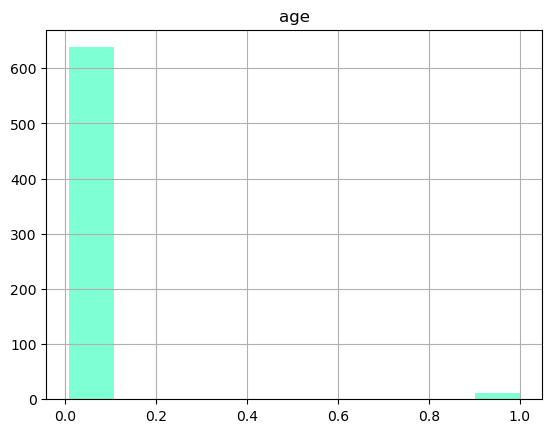

In [69]:
data.hist(column="age", grid=True, color = "#7FFFD4")

array([[<Axes: title={'center': 'support'}>]], dtype=object)

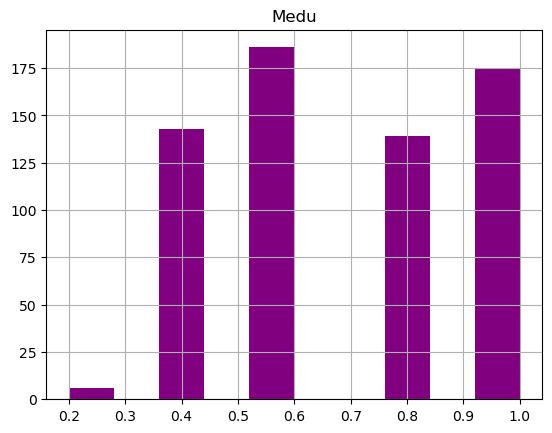

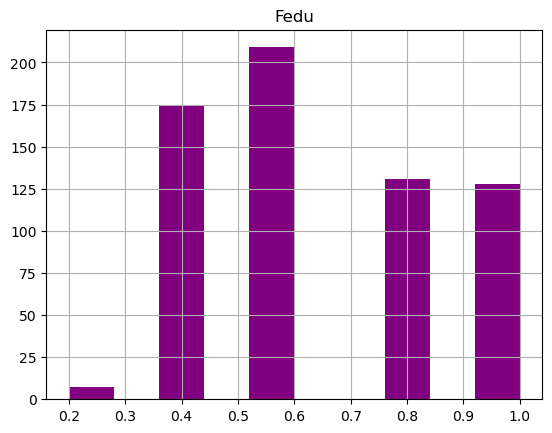

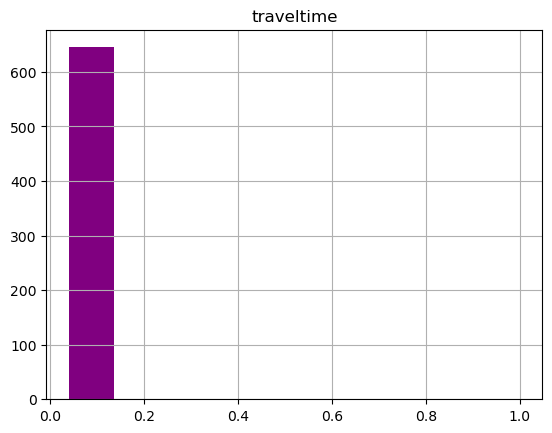

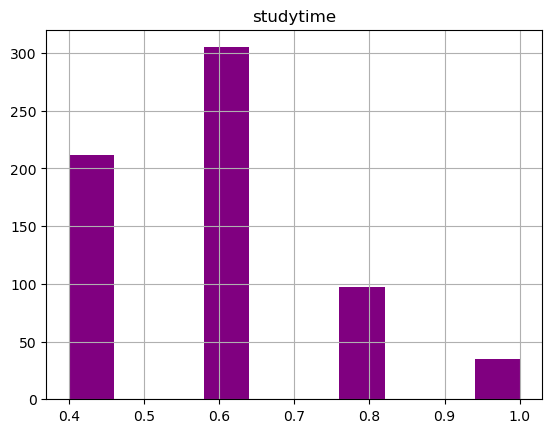

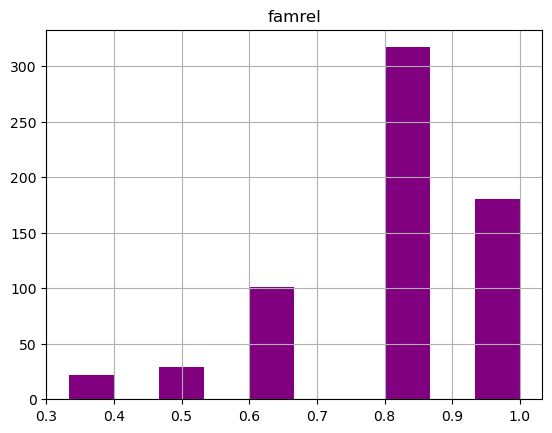

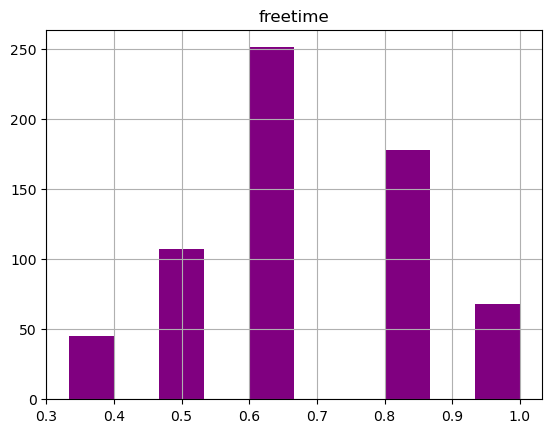

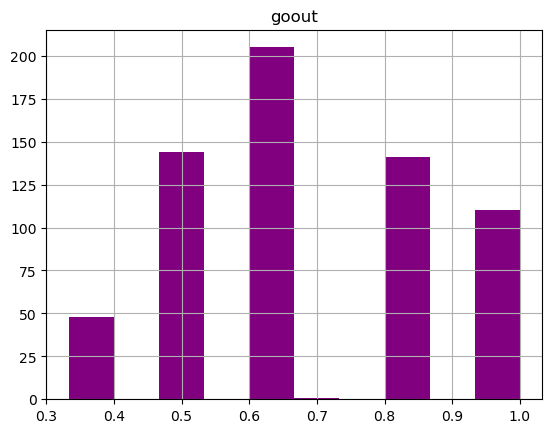

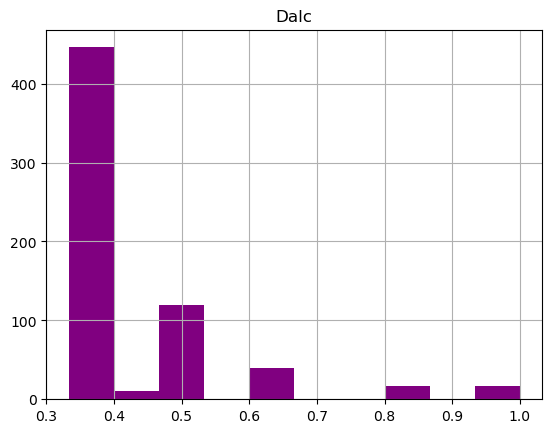

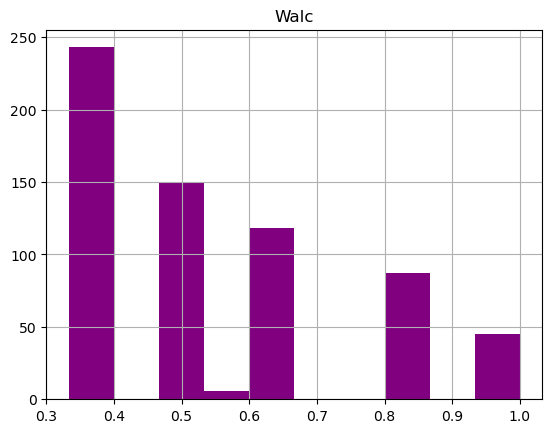

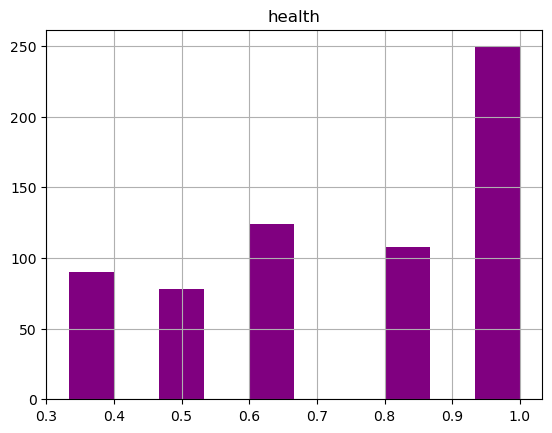

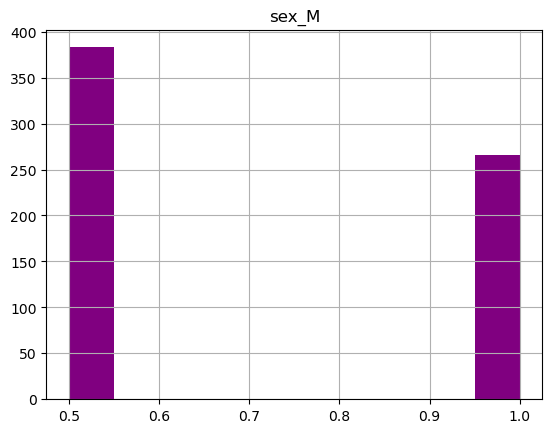

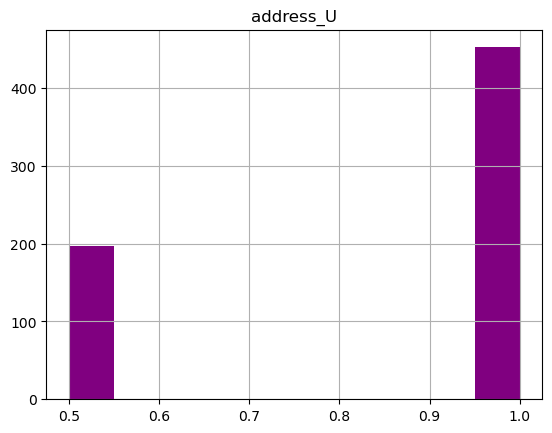

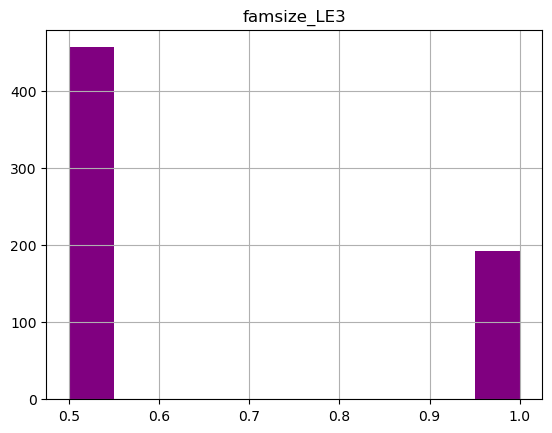

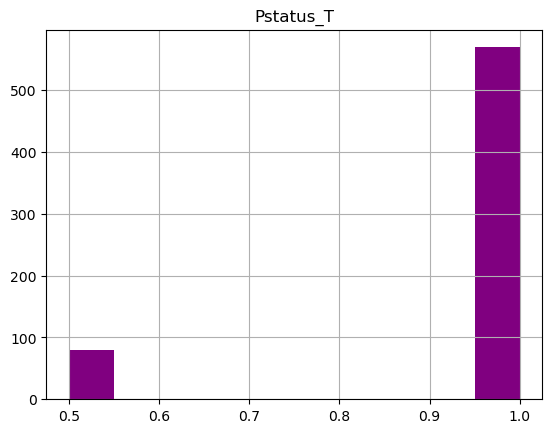

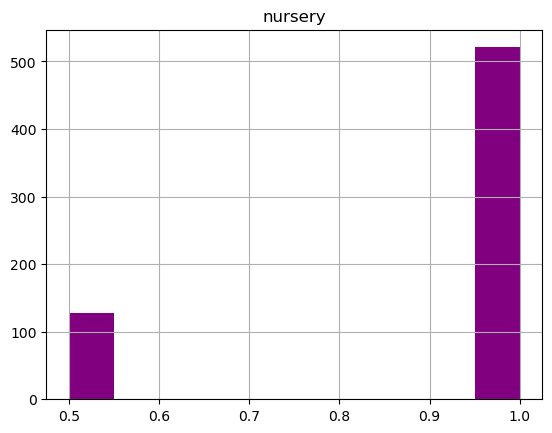

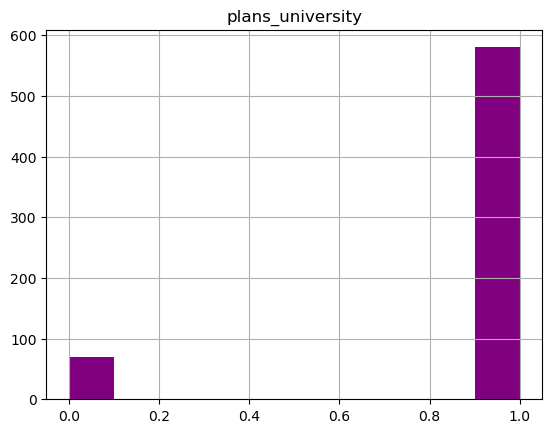

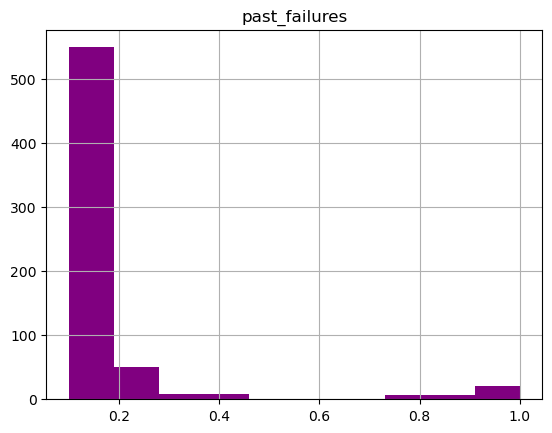

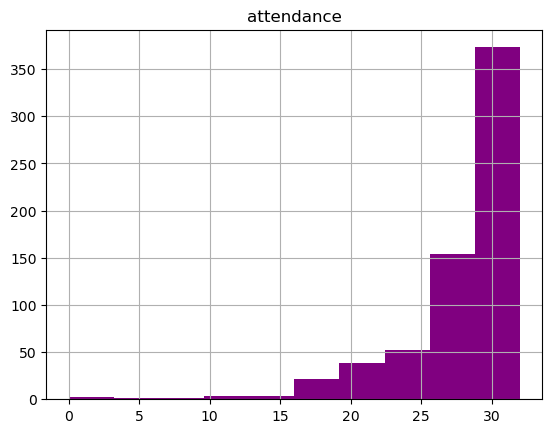

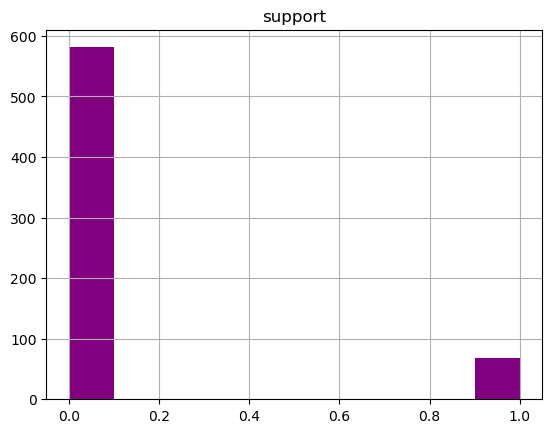

In [70]:
data.hist(column="Medu", grid=True, color = "purple")
data.hist(column="Fedu", grid=True, color = "purple")
data.hist(column="traveltime", grid=True, color = "purple")
data.hist(column="studytime", grid=True, color = "purple")
data.hist(column="famrel", grid=True, color = "purple")
data.hist(column="freetime", grid=True, color = "purple")
data.hist(column="goout", grid=True, color = "purple")
data.hist(column="Dalc", grid=True, color = "purple")
data.hist(column="Walc", grid=True, color = "purple")
data.hist(column="health", grid=True, color = "purple")
data.hist(column="sex_M", grid=True, color = "purple")
data.hist(column="address_U", grid=True, color = "purple")
data.hist(column="famsize_LE3", grid=True, color = "purple")
data.hist(column="Pstatus_T", grid=True, color = "purple")
data.hist(column="nursery", grid=True, color = "purple")
data.hist(column="plans_university", grid=True, color = "purple")
data.hist(column="past_failures", grid=True, color = "purple")
data.hist(column="attendance", grid=True, color = "purple")
data.hist(column="support", grid=True, color = "purple")
#сразу видно, что некоторые данные введены некорректно, но отследить их глазами сложно
#строим диаграммы, так заметить, где есть ошибки, проще

In [71]:
# Исправление найденных ошибок
#многие ввели год рожения. мировой рекорд - 122 полных года, так что если кто то ввел число больше - исправляем
for i in range(len(data['age'])):
    if (data['age'][i] > 123):
        data['age'][i] = 2006 - data['age'][i]

sum_tt = 0
cnt_tt = 0
#тут мы исключаем все неподходящие данные и заменяем на среднее из подходящих
for i in data['traveltime']:
    if (1 <= i <= 4):
        sum_tt += i
        cnt_tt += 1
mid_tt = int(sum_tt/cnt_tt)
for i in range(len(data['traveltime'])):
    if not (1 <= data['traveltime'][i] <= 4):
        data['traveltime'][i] = mid_tt

data['traveltime'] = data['traveltime'].astype(int)
        

C:\Users\Mama\AppData\Local\Temp\ipykernel_17404\1900689929.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['traveltime'][i] = mid_tt


__(1.5 балла)__

Другой простой способ найти выбросы &mdash; сделать предсказаниепосчитать ошибку на каждом объекте по отдельности и посмотреть на объекты с наибольшей ошибкой. Обратите внимание, что просто удалять все объекты с высокой ошибкой нельзя &mdash; это, конечно, хороший способ добиться меньшей ошибки (на данной выборке), но одновременно вы ухудшите обобщающую способность алгоритма. Вместо этого вам нужно найти однозначно ошибочные записи и их исправить.

*Hint: возможно, все проблемы уже были найдены первым способом; для проверки &mdash; в сумме здесь нужно исправить 3 проблемы.*

Для поиска ошибки на одном отдельном обьекте придётся обучить линейную регрессию руками. Частичный пример, допишите код. Постройте гистограмму распределения ошибок

In [72]:
import sklearn
from sklearn import linear_model
regression = linear_model.LinearRegression().fit(data, result) #create model and train it
prediction = #calculate prediction for one object for vector x
error = (prediction - y)**2 #simple error - square error

SyntaxError: invalid syntax (3289234131.py, line 4)

In [ ]:
# Your code here
# ...

### Финальное предсказание и отчёт

Проведите предсказание еще раз и сравните качество с исходным. Запишите свои наблюдения - как изменялось качество обучения модели при использовании разных модификаций данных. 

In [ ]:
X = data[1:]
Y = scores
#снова запускаем линейную регрессию и видим, что данные поменялись, точность увеличислась. ура 
p = model_selection.cross_val_score(reg, X, Y, cv = 5)
p_mid = sum(p)/len(p)
print(p)
print(p_mid)

Итак, было 4 ошибки:
1)Слипшиеся столбцы
2)Отсутствие данных
3)Некоторые значения колонки age представляют собой год рождения, а не возраст
4)Проблема была в том, что в признаке traveltime были странные значения, не входящие в диапазон [1, 4]. 
Все 4 проблемы были устранены.

Наблюдение:

При использовании в задаче 2 для выравнивания замены на среднее, средняя точность модели составляла 0.15313197006853888 и 0.1627966332339284 до и после "борьбы с выбросами" соответственно.

При использовании в задаче 2 для выравнивания замены на медиану, средняя точность модели составляла 0.1537133530059613 и 0.16342268704281554 до и после "борьбы с выбросами" соответственно.

Значит, в случае данной модели выгоднее провести замену на медиану и обязательно сделать "борьбу с выбросами".